In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load datasets from xlsx and convert to csv
file_paths = {
    "coverage_data": "C:/Users/Administrator/OneDrive/Documents/DS projects/coverage-data.xlsx",
    "incidence_rate": "C:/Users/Administrator/OneDrive/Documents/DS projects/vacine analysis/incidence-rate-data.xlsx",
    "reported_cases": "C:/Users/Administrator/OneDrive/Documents/DS projects/vacine analysis/reported-cases-data.xlsx",
    "vaccine_introduction": "C:/Users/Administrator/OneDrive/Documents/DS projects/vacine analysis/vaccine-introduction-data.xlsx",
    "vaccine_schedule": "C:/Users/Administrator/OneDrive/Documents/DS projects/vacine analysis/vaccine_schedule.xlsx"
}

datasets = {}

In [152]:
reported_cases=pd.read_excel("C:/Users/Administrator/OneDrive/Documents/DS projects/vacine analysis/reported-cases-data.xlsx")
vaccine_introduction=pd.read_excel("C:/Users/Administrator/OneDrive/Documents/DS projects/vacine analysis/vaccine-introduction-data.xlsx")
vaccine_schedule=pd.read_excel("C:/Users/Administrator/OneDrive/Documents/DS projects/vacine analysis/vaccine-schedule-data.xlsx")


In [154]:
cleaned_file_path = "cleaned_coverage_data.csv"
df.to_csv(cleaned_file_path, index=False)

EDA PART

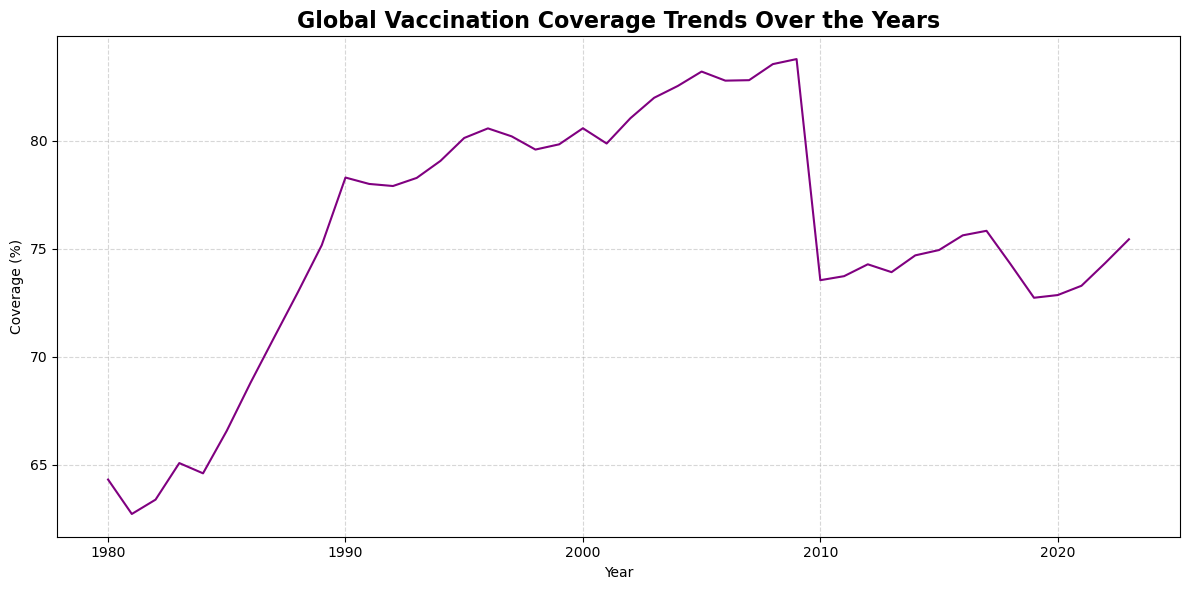

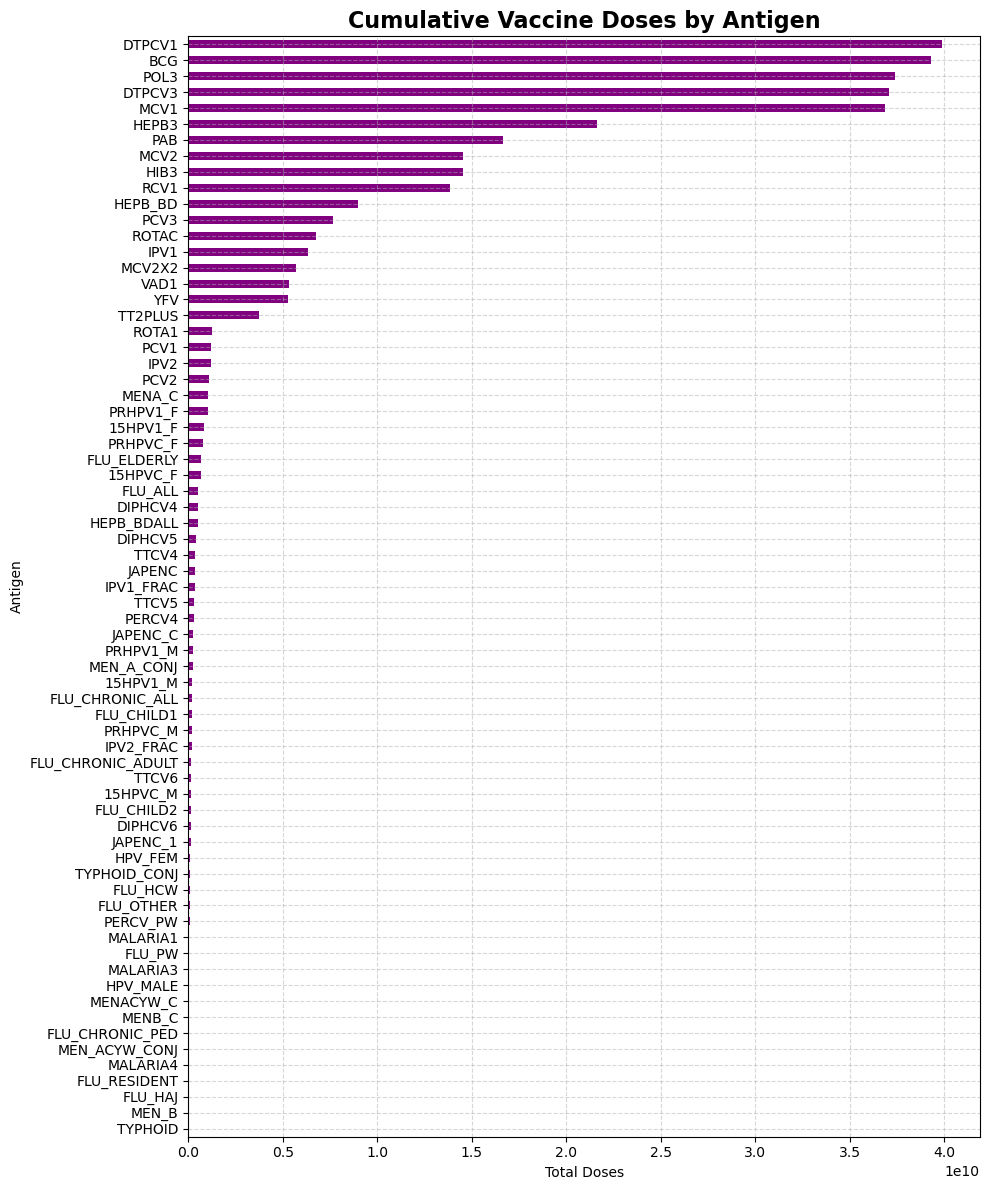

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the DataFrame
df = coverage_data.copy()

# 1. Drop rows with critical missing values
df.dropna(subset=['CODE', 'NAME', 'YEAR'], inplace=True)

# 2. Impute missing values for numerical columns grouped by ANTIGEN
for col in ['TARGET_NUMBER', 'DOSES', 'COVERAGE']:
    df[col] = df.groupby('ANTIGEN')[col].transform(lambda x: x.fillna(x.median()))

# 3. Normalize COVERAGE to percentage if it's in decimal form
df['COVERAGE'] = df['COVERAGE'].apply(lambda x: x * 100 if pd.notna(x) and x < 1 else x)

# 4. Convert columns to integer types
df['YEAR'] = df['YEAR'].astype(int)
df['TARGET_NUMBER'] = df['TARGET_NUMBER'].astype(int)
df['DOSES'] = df['DOSES'].astype(int)

# 5. Plot: Vaccination Coverage Over the Years
# Coverage over years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='YEAR', y='COVERAGE', errorbar=None, color='purple')
plt.title('Global Vaccination Coverage Trends Over the Years', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Coverage (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Calculate total doses by ANTIGEN
total_doses_by_antigen = df.groupby('ANTIGEN')['DOSES'].sum().sort_values()

# Plot the total doses by ANTIGEN
plt.figure(figsize=(10, 12))
total_doses_by_antigen.plot(kind='barh', color='purple')
plt.title('Cumulative Vaccine Doses by Antigen', fontsize=16, fontweight='bold')
plt.xlabel('Total Doses')
plt.ylabel('Antigen')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



cleaned_incidence_data saved successfully


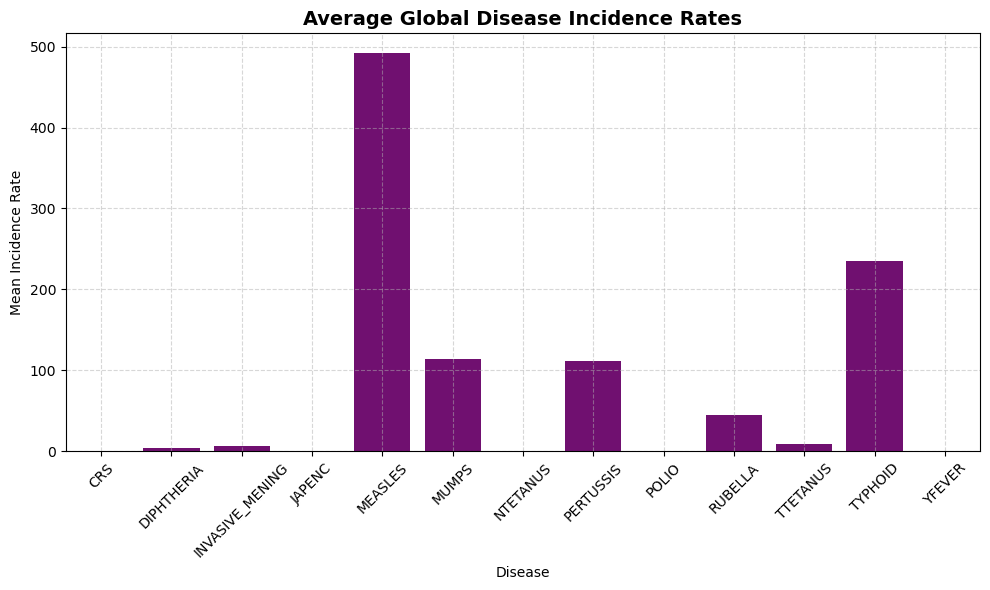

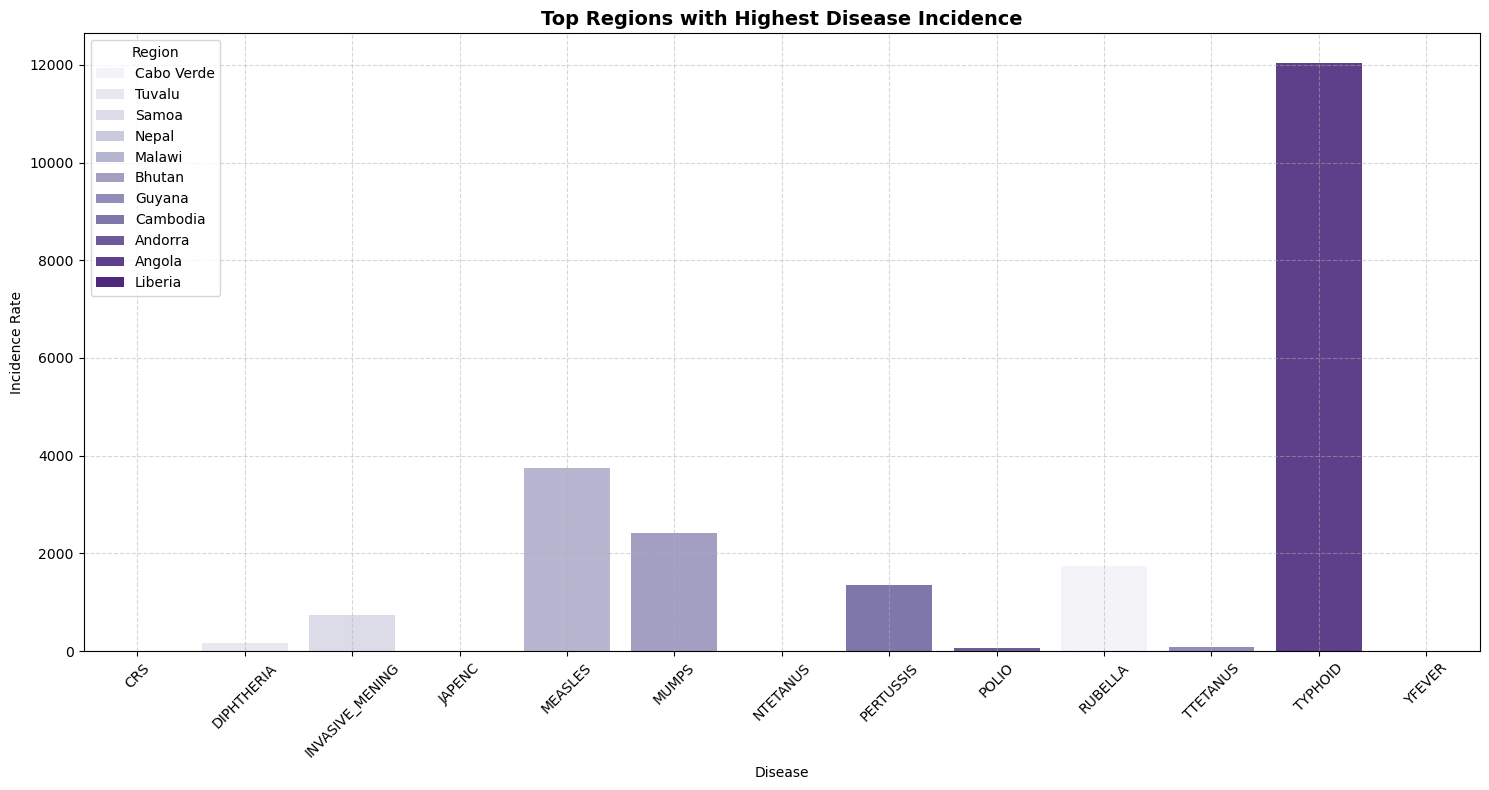

In [164]:
df = incident_data

# Handling missing values
df.dropna(subset=['CODE', 'NAME', 'YEAR'], inplace=True)

# Imputing missing values
df['INCIDENCE_RATE'] = df.groupby(['DISEASE'])['INCIDENCE_RATE'].transform(lambda x: x.fillna(x.median()))

# Converting year to int
df['YEAR'] = df['YEAR'].astype(int)

# Saving cleaned data
cleaned_file_path = "cleaned_incidence_data.csv"
df.to_csv(cleaned_file_path, index=False)
print("cleaned_incidence_data saved successfully")

# EDA

# Mean incidence rate for each disease
disease_rates = df.groupby('DISEASE')['INCIDENCE_RATE'].mean().reset_index()

# Plot: Mean incidence rate by disease
plt.figure(figsize=(10, 6))
sns.barplot(x="DISEASE", y="INCIDENCE_RATE", data=disease_rates, color='purple')
plt.xlabel("Disease")
plt.ylabel("Mean Incidence Rate")
plt.title("Average Global Disease Incidence Rates", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Mean incidence rate by region and disease
regional_rates = df.groupby(["NAME", "DISEASE"])["INCIDENCE_RATE"].mean().reset_index()

# Top region for each disease
top_regions_per_disease = regional_rates.loc[regional_rates.groupby('DISEASE')['INCIDENCE_RATE'].idxmax()]

# Plot: Top regions with highest incidence rates for each disease
plt.figure(figsize=(15, 8))
sns.barplot(x="DISEASE", y="INCIDENCE_RATE", hue="NAME", data=top_regions_per_disease, palette='Purples')
plt.xlabel("Disease")
plt.ylabel("Incidence Rate")
plt.title("Top Regions with Highest Disease Incidence", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


cleaned_reported_data saved successfully


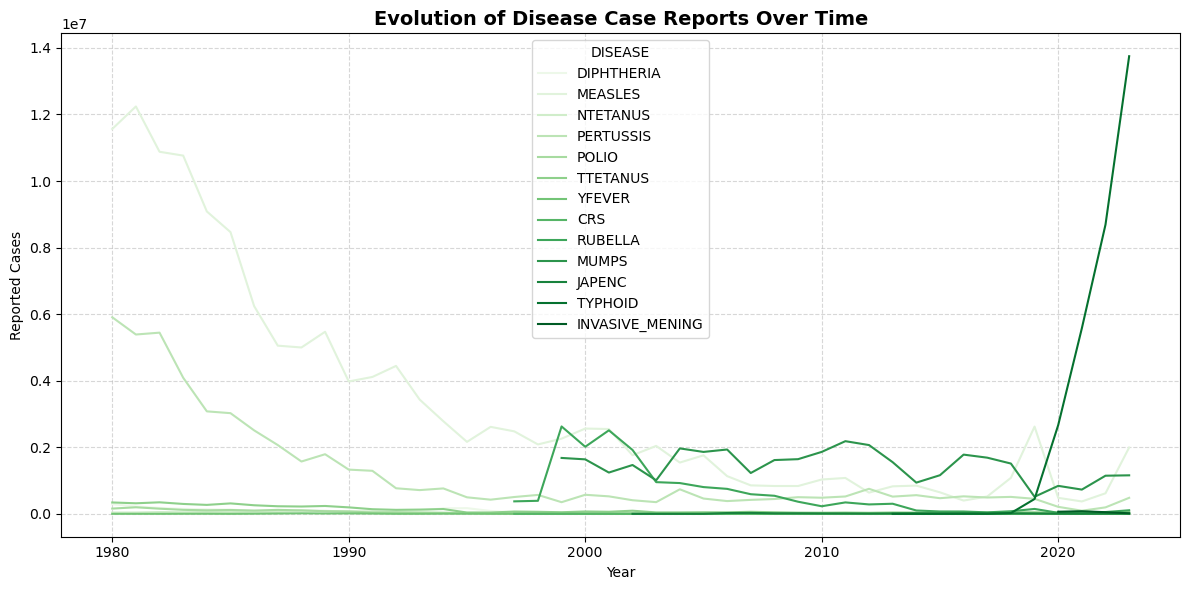

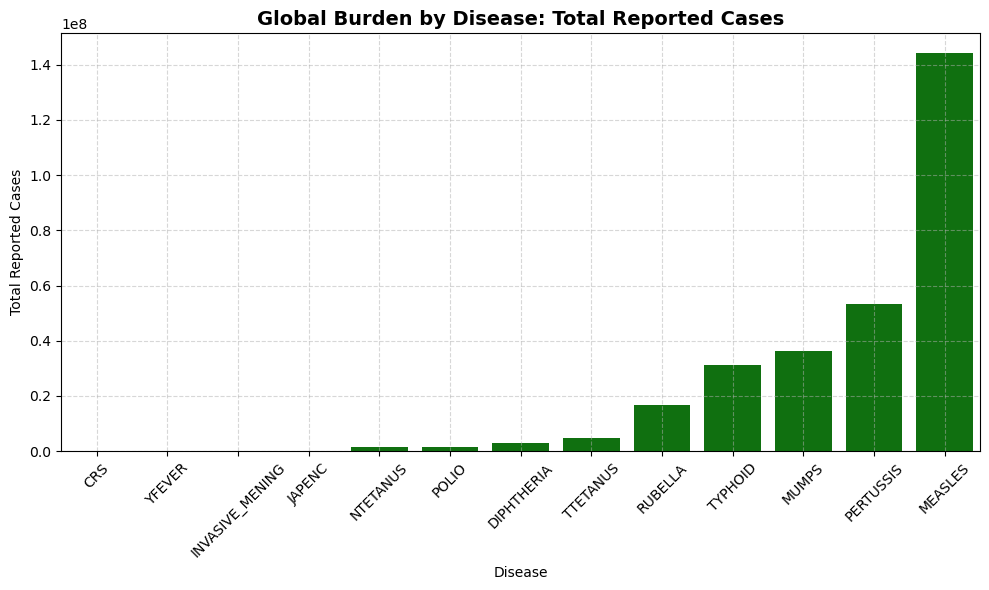

In [166]:
df = reported_cases

# Drop rows with missing essential data
df.dropna(subset=['CODE', 'NAME', 'YEAR'], inplace=True)

# Impute missing case numbers with median per disease
df['CASES'] = df.groupby(['DISEASE'])['CASES'].transform(lambda x: x.fillna(x.median()))

# Convert data types
df['YEAR'] = df['YEAR'].astype(int)
df['CASES'] = df['CASES'].astype(int)

# Save cleaned data
cleaned_file_path = "cleaned_reported_cases.csv"
df.to_csv(cleaned_file_path, index=False)
print("cleaned_reported_data saved successfully")

# EDA: Reported Cases Over Time per Disease
cases_over_time = df.groupby(['YEAR', 'DISEASE'])['CASES'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x="YEAR", y="CASES", hue="DISEASE", data=cases_over_time, palette="Greens")
plt.xlabel("Year")
plt.ylabel("Reported Cases")
plt.title("Evolution of Disease Case Reports Over Time", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Total number of cases per disease
disease_counts = df.groupby("DISEASE")["CASES"].sum().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=disease_counts.index, y=disease_counts.values, color='green')
plt.xlabel("Disease")
plt.ylabel("Total Reported Cases")
plt.title("Global Burden by Disease: Total Reported Cases", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


upload successfully


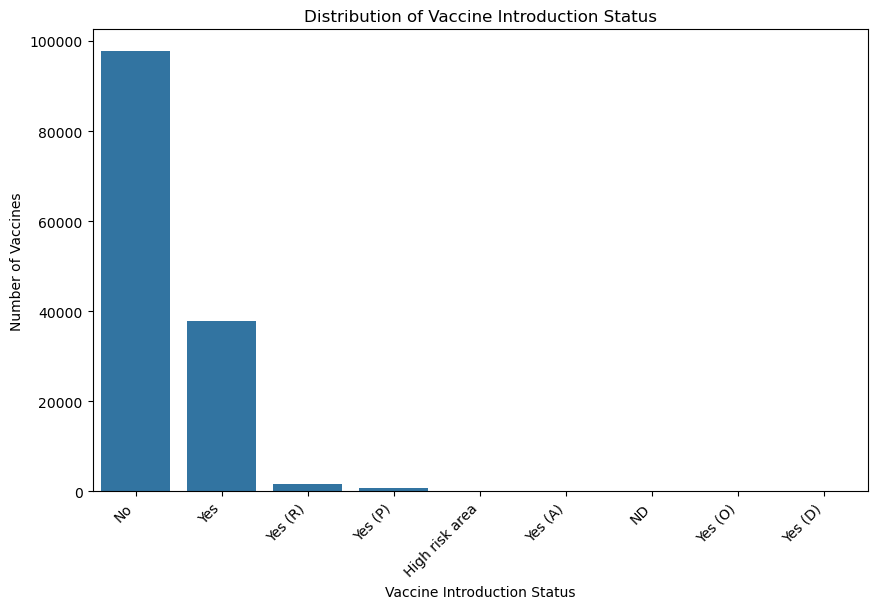

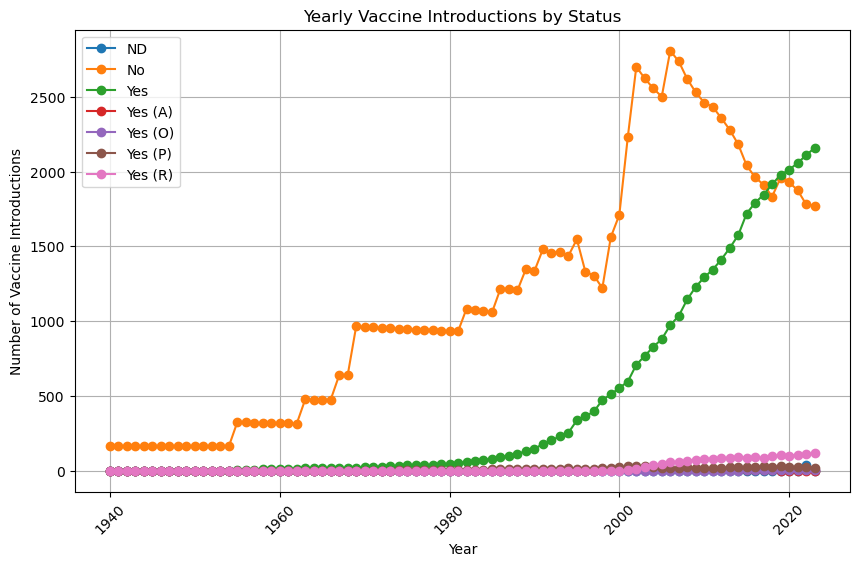

In [94]:
df=vaccine_introduction
df.isna().sum()
# removing null values

df.dropna(subset=['YEAR'], inplace=True)
#converting YEAR to int

df['YEAR']= df['YEAR'].astype(int)
cleaned_file_path = "cleaned_vaccine_introduction.csv"
df.to_csv(cleaned_file_path, index=False)
print("upload successfully")
#eda
# Count occurrences of each INTRO value
intro_counts = df['INTRO'].value_counts()
intro_counts
plt.figure(figsize=(10, 6))
sns.barplot(x=intro_counts.index, y=intro_counts.values)
plt.xlabel("Vaccine Introduction Status")
plt.ylabel("Number of Vaccines")
plt.title("Distribution of Vaccine Introduction Status")
plt.xticks(rotation=45, ha='right')
plt.show()


intro_statuses = ['Yes', 'Yes (P)', 'Yes (R)', 'Yes (A)', 'Yes (O)', 'Yes (S)', 'Yes (OPV)', 'High risk','No', 'No (D)', 'ND', 'NR']
introduced_vaccines = df[df['INTRO'].isin(intro_statuses)]


# Group by YEAR and INTRO and count occurrences
yearly_intro_counts = introduced_vaccines.groupby(['YEAR', 'INTRO']).size().reset_index(name='Count')

# Pivot table to reshape data
yearly_intro_pivot = yearly_intro_counts.pivot(index='YEAR', columns='INTRO', values='Count').fillna(0)

# Each introduction status
plt.figure(figsize=(10, 6))
for col in yearly_intro_pivot.columns:
    plt.plot(yearly_intro_pivot.index, yearly_intro_pivot[col], label=col, marker='o')

plt.xlabel("Year")
plt.ylabel("Number of Vaccine Introductions")
plt.title("Yearly Vaccine Introductions by Status")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Upload successfully!


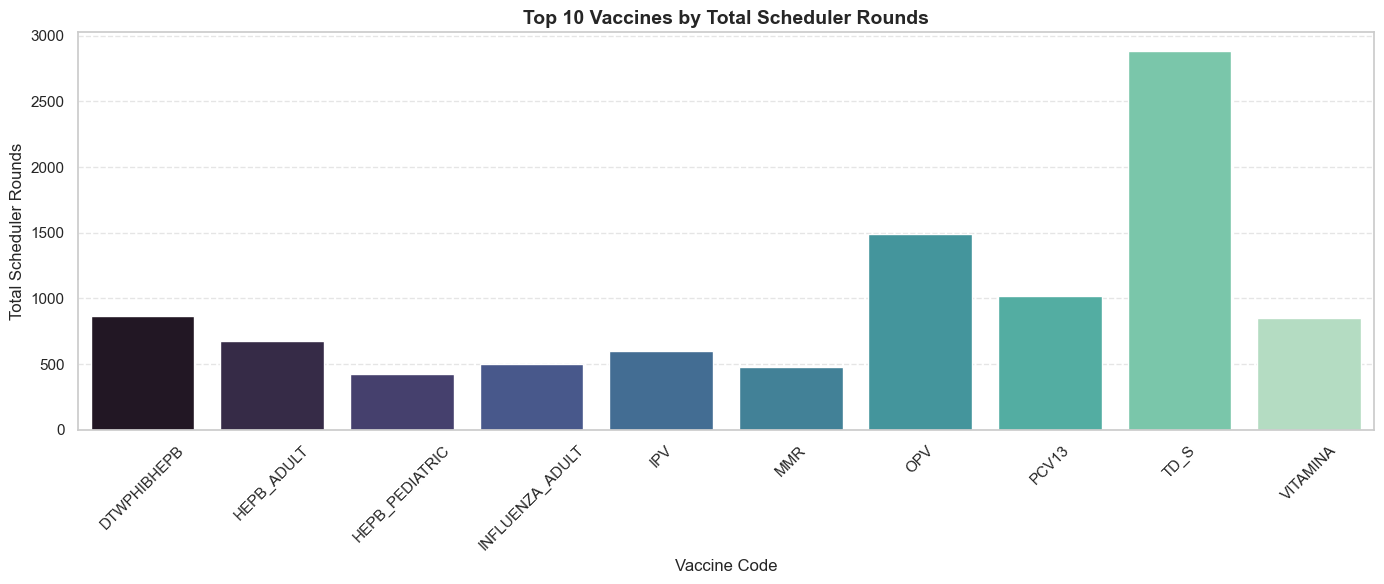

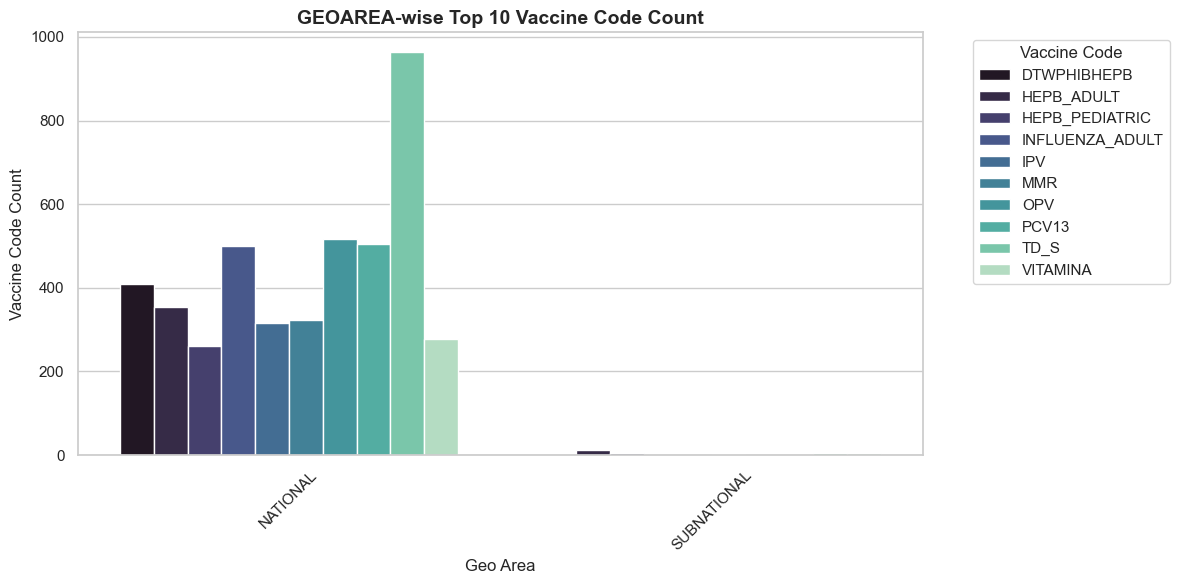

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Load and clean data
df = vaccine_schedule
df.dropna(subset=['YEAR'], inplace=True)

# Convert data types
df['YEAR'] = df['YEAR'].astype(int)
df['SCHEDULEROUNDS'] = df['SCHEDULEROUNDS'].astype(int)

# Impute missing values
df['AGEADMINISTERED'] = df['AGEADMINISTERED'].fillna(df['AGEADMINISTERED'].mode()[0])
df['TARGETPOP'] = df['TARGETPOP'].fillna(df['TARGETPOP'].mode()[0])
df['SOURCECOMMENT'] = df['SOURCECOMMENT'].fillna('No comment')
df['GEOAREA'] = df['GEOAREA'].fillna('NATIONAL')

# Save cleaned file
cleaned_file_path = "cleaned_vaccine_schedule.csv"
df.to_csv(cleaned_file_path, index=False)
print("Upload successfully!")

# EDA: Top 10 VACCINECODE by Scheduler Rounds
N = 10
top_vaccine_codes = df['VACCINECODE'].value_counts().nlargest(N).index
filtered_df = df[df['VACCINECODE'].isin(top_vaccine_codes)]

# Scheduler Rounds Sum
vaccine_schedulerounds_sum = filtered_df.groupby('VACCINECODE')['SCHEDULEROUNDS'].sum().reset_index()

#  Top Vaccine Codes by Scheduler Rounds
plt.figure(figsize=(14, 6))
sns.barplot(
    x='VACCINECODE',
    y='SCHEDULEROUNDS',
    hue='VACCINECODE',  # Fixes palette warning
    data=vaccine_schedulerounds_sum,
    palette="mako",
    legend=False
)
plt.title(f"Top {N} Vaccines by Total Scheduler Rounds", fontsize=14, fontweight='bold')
plt.xlabel('Vaccine Code')
plt.ylabel('Total Scheduler Rounds')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#  GEOAREA-wise VACCINECODE count
geoarea_vaccine_counts = filtered_df.groupby(['GEOAREA', 'VACCINECODE']).size().reset_index(name='counts')

plt.figure(figsize=(12, 6))
sns.barplot(
    x='GEOAREA',
    y='counts',
    hue='VACCINECODE',
    data=geoarea_vaccine_counts,
    palette='mako'
)
plt.title(f"GEOAREA-wise Top {N} Vaccine Code Count", fontsize=14, fontweight='bold')
plt.xlabel('Geo Area')
plt.ylabel('Vaccine Code Count')
plt.xticks(rotation=45)
plt.legend(title='Vaccine Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [100]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine, text

In [104]:
coverage_data = pd.read_csv('cleaned_coverage_data.csv')
incident_data = pd.read_csv('cleaned_incidence_data.csv')
reported_cases_data = pd.read_csv('cleaned_reported_cases.csv')
vaccine_intro_data = pd.read_csv('cleaned_vaccine_introduction.csv')
vaccine_schedule_data = pd.read_csv('cleaned_vaccine_schedule.csv')

In [115]:
# creating database

import mysql.connector
conn = None 
connection= mysql.connector.connect(
    host = "localhost",
    user="root",
    password="uvagai@11")
try:
   
       with connection.cursor() as cur:
           cur.execute("CREATE DATABASE IF NOT EXISTS vaccination_db")
           print("database vaccination_db is ensure")
        
        
except mysql.connector.Error as err:
    print("Error creating database:",err)
    connection.close()
    exist()
    
#creating table

host = "localhost"
user = "root"
password = "uvagai@11"
database = "vaccination_db"

try:
    conn = pymysql.connect(
        host=host,
        user=user,
        password=password,
        database=database
    )
    cursor = conn.cursor()

    create_coverage_table = """
    CREATE TABLE Coverage (
        `GROUP` VARCHAR(255),
        CODE VARCHAR(100),
        NAME VARCHAR(255),
        YEAR INT,
        ANTIGEN VARCHAR(255),
        ANTIGEN_DESCRIPTION TEXT,
        COVERAGE_CATEGORY VARCHAR(255),
        COVERAGE_CATEGORY_DESCRIPTION TEXT,
        TARGET_NUMBER BIGINT,
        DOSES INT,
        COVERAGE FLOAT
    );
    """
    cursor.execute(create_coverage_table)

    create_incidence_rate_table = """
    CREATE TABLE IncidenceRate (
        `GROUP` VARCHAR(255),
        CODE VARCHAR(100),
        NAME VARCHAR(255),
        YEAR INT,
        DISEASE VARCHAR(255),
        DISEASE_DESCRIPTION TEXT,
        DENOMINATOR VARCHAR(255),
        INCIDENCE_RATE FLOAT
    );
    """
    cursor.execute(create_incidence_rate_table)

    create_reported_cases_table = """
    CREATE TABLE ReportedCases (
        `GROUP` VARCHAR(255),
        CODE VARCHAR(100),
        NAME VARCHAR(255),
        YEAR INT,
        DISEASE VARCHAR(255),
        DISEASE_DESCRIPTION TEXT,
        CASES INT
    );
    """
    cursor.execute(create_reported_cases_table)

    create_vaccine_introduction_table = """
    CREATE TABLE VaccineIntroduction (
        ISO_3_CODE VARCHAR(100),
        COUNTRYNAME VARCHAR(255),
        WHO_REGION VARCHAR(255),
        YEAR INT,
        DESCRIPTION TEXT,
        INTRO VARCHAR(100)
    );
    """
    cursor.execute(create_vaccine_introduction_table)

    create_vaccine_schedule_table = """
    CREATE TABLE VaccineSchedule (
        ISO_3_CODE VARCHAR(100),
        COUNTRYNAME VARCHAR(255),
        WHO_REGION VARCHAR(255),
        YEAR INT,
        VACCINECODE VARCHAR(255),
        VACCINE_DESCRIPTION TEXT,
        SCHEDULEROUNDS INT,
        TARGETPOP VARCHAR(255),
        TARGETPOP_DESCRIPTION TEXT,
        GEOAREA VARCHAR(100),
        AGEADMINISTERED VARCHAR(255),
        SOURCECOMMENT TEXT
    );
    """
    cursor.execute(create_vaccine_schedule_table)

    conn.commit()
    print("Tables created successfully.")

except pymysql.Error as e:
    print(f"Error creating tables: {e}")

finally:
    if conn:
        conn.close()

database vaccination_db is ensure
Tables created successfully.


In [117]:
# importing data into tables

def import_data(file_path, table_name):
    try:
        conn = pymysql.connect(
            host=host,
            user=user,
            password=password,
            database=database
        )
        cursor = conn.cursor()

        df = pd.read_csv(file_path)
        for index, row in df.iterrows():
            values = tuple(row)
            sql = f"INSERT INTO {table_name} VALUES {values}"
            cursor.execute(sql)
        conn.commit()
        print(f"Data imported successfully from {file_path} to {table_name}")

    except Exception as e:
        print(f"Error importing data from {file_path}: {e}")

    finally:
        conn.close()

In [119]:
import_data('cleaned_coverage_data.csv', 'Coverage')
import_data('cleaned_incidence_data.csv', 'IncidenceRate')
import_data('cleaned_reported_cases.csv', 'ReportedCases')
import_data('cleaned_vaccine_introduction.csv', 'VaccineIntroduction')
import_data('cleaned_vaccine_schedule.csv', 'VaccineSchedule')

Data imported successfully from cleaned_coverage_data.csv to Coverage
Data imported successfully from cleaned_incidence_data.csv to IncidenceRate
Data imported successfully from cleaned_reported_cases.csv to ReportedCases
Data imported successfully from cleaned_vaccine_introduction.csv to VaccineIntroduction
Data imported successfully from cleaned_vaccine_schedule.csv to VaccineSchedule


In [121]:
host = "localhost"
user = "root"
password = "uvagai@11"
database = "vaccination_db"

try:
    conn = pymysql.connect(
        host=host,
        user=user,
        password=password,
        database=database
    )
    cursor = conn.cursor()


# Creating Countries table
    create_countries_table = """
    CREATE TABLE Countries (
        `GROUP` VARCHAR(255),
        CODE VARCHAR(100),
        NAME VARCHAR(255),
        PRIMARY KEY (CODE) 
    );
    """
    cursor.execute(create_countries_table)

    # Insert unique country data from Coverage table
    insert_countries_from_coverage = """
    INSERT IGNORE INTO Countries (`GROUP`, CODE, NAME)
    SELECT DISTINCT `GROUP`, CODE, NAME 
    FROM Coverage;
    """
    cursor.execute(insert_countries_from_coverage)

    # Create Years table
    create_years_table = """
    CREATE TABLE Years (
        YEAR INT PRIMARY KEY
    );
    """
    cursor.execute(create_years_table)

    # Insert unique years from vaccineintroduction table
    insert_years_from_vaccineintroduction = """
    INSERT IGNORE INTO Years (YEAR)
    SELECT DISTINCT YEAR 
    FROM VaccineIntroduction;
    """
    cursor.execute(insert_years_from_vaccineintroduction)

        # Create Diseases table
    create_diseases_table = """
    CREATE TABLE Diseases (
        DISEASE VARCHAR(255) PRIMARY KEY,
        DISEASE_DESCRIPTION TEXT
    );
    """
    cursor.execute(create_diseases_table)

    # Insert unique diseases from IncidenceRate table
    insert_diseases_from_incidencerate = """
    INSERT IGNORE INTO Diseases (DISEASE, DISEASE_DESCRIPTION)
    SELECT DISTINCT DISEASE, DISEASE_DESCRIPTION 
    FROM IncidenceRate;
    """
    cursor.execute(insert_diseases_from_incidencerate)

        # Create WHO_Region table
    create_who_region_table = """
    CREATE TABLE WHO_Region (
        ISO_3_CODE VARCHAR(100),
        COUNTRYNAME VARCHAR(255),
        WHO_REGION VARCHAR(255),
        PRIMARY KEY (ISO_3_CODE, COUNTRYNAME) 
    );
    """
    cursor.execute(create_who_region_table)

    # Insert unique WHO_Region data from VaccineSchedule table
    insert_who_region_from_VaccineSchedule = """
    INSERT IGNORE INTO WHO_Region (ISO_3_CODE, COUNTRYNAME, WHO_REGION)
    SELECT DISTINCT ISO_3_CODE, COUNTRYNAME, WHO_REGION 
    FROM VaccineSchedule;
    """
    cursor.execute(insert_who_region_from_VaccineSchedule)

    conn.commit()
    print("Tables are created and data is inserted")
except pymysql.Error as e:
    print(f"Database error: {e}")

finally:
    conn.close()

Tables are created and data is inserted


ADD PRIMARY AND FOREIGN KEY

In [125]:
host = "localhost"
user = "root"
password = "uvagai@11"
database = "vaccination_db"

try:
    conn = pymysql.connect(
        host=host,
        user=user,
        password=password,
        database=database
    )
    cursor = conn.cursor()
    
    # Add primary and foreign keys to Coverage table
    alter_coverage_table = """
    ALTER TABLE Coverage
    ADD FOREIGN KEY (CODE) REFERENCES Countries(CODE), 
    ADD FOREIGN KEY (YEAR) REFERENCES Years(YEAR);
    """
    cursor.execute(alter_coverage_table)

    # Add primary and foreign keys to IncidenceRate table
    alter_incidencerate_table = """
    ALTER TABLE IncidenceRate
    ADD FOREIGN KEY (CODE) REFERENCES Countries(CODE),
    ADD FOREIGN KEY (DISEASE) REFERENCES Diseases(DISEASE),
    ADD FOREIGN KEY (YEAR) REFERENCES Years(YEAR);
    """
    cursor.execute(alter_incidencerate_table)

    # Add primary and foreign keys to ReportedCases table
    alter_reportedcases_table = """
    ALTER TABLE ReportedCases
    ADD FOREIGN KEY (CODE) REFERENCES Countries(CODE),
    ADD FOREIGN KEY (DISEASE) REFERENCES Diseases(DISEASE),
    ADD FOREIGN KEY (YEAR) REFERENCES Years(YEAR);
    """
    cursor.execute(alter_reportedcases_table)

    # Add primary and foreign keys to VaccineIntroduction table
    alter_vaccineintroduction_table = """
    ALTER TABLE VaccineIntroduction
    ADD FOREIGN KEY (ISO_3_CODE, COUNTRYNAME) REFERENCES WHO_Region(ISO_3_CODE, COUNTRYNAME), 
    ADD FOREIGN KEY (YEAR) REFERENCES Years(YEAR); 
    """
    cursor.execute(alter_vaccineintroduction_table)

    # Add primary and foreign keys to VaccineSchedule table
    alter_vaccineschedule_table = """
    ALTER TABLE VaccineSchedule
    ADD FOREIGN KEY (ISO_3_CODE, COUNTRYNAME) REFERENCES WHO_Region(ISO_3_CODE, COUNTRYNAME), 
    ADD FOREIGN KEY (YEAR) REFERENCES Years(YEAR); 
    """
    cursor.execute(alter_vaccineschedule_table)

    conn.commit()
    print("Primary and foreign keys added successfully.")

except pymysql.Error as e:
    print(f"Error adding primary and foreign keys: {e}")

finally:
    conn.close()

Primary and foreign keys added successfully.


In [127]:
drop_queries = [
        # Drop duplicate columns from Coverage
        "ALTER TABLE Coverage DROP COLUMN NAME, DROP COLUMN `GROUP`;",
        # Drop duplicate columns from IncidenceRate
        "ALTER TABLE IncidenceRate DROP COLUMN NAME, DROP COLUMN `GROUP`;",
        "ALTER TABLE IncidenceRate DROP COLUMN DISEASE_DESCRIPTION;",
        # Drop duplicate columns from ReportedCases
        "ALTER TABLE ReportedCases DROP COLUMN NAME, DROP COLUMN `GROUP`;",
        "ALTER TABLE ReportedCases DROP COLUMN DISEASE_DESCRIPTION;",
        # Drop duplicate columns from VaccineIntroduction
        "ALTER TABLE VaccineIntroduction DROP COLUMN COUNTRYNAME, DROP COLUMN WHO_REGION;",
        # Drop duplicate columns from VaccineSchedule
        "ALTER TABLE VaccineSchedule DROP COLUMN COUNTRYNAME, DROP COLUMN WHO_REGION;"
]

In [129]:
try:
    conn = pymysql.connect(
        host=host,
        user=user,
        password=password,
        database=database
    )
    cursor = conn.cursor()

    for query in drop_queries:
        try:
            cursor.execute(query)
            print(f"Executed: {query.strip()}")
        except pymysql.Error as e:
            print(f"Skipping column drop: {query.strip()} - Error: {e}")

    conn.commit()
    print("Duplicate columns dropped successfully where applicable.")

except pymysql.Error as e:
    print(f"Error processing the database: {e}")

finally:
    conn.close()

Executed: ALTER TABLE Coverage DROP COLUMN NAME, DROP COLUMN `GROUP`;
Executed: ALTER TABLE IncidenceRate DROP COLUMN NAME, DROP COLUMN `GROUP`;
Executed: ALTER TABLE IncidenceRate DROP COLUMN DISEASE_DESCRIPTION;
Executed: ALTER TABLE ReportedCases DROP COLUMN NAME, DROP COLUMN `GROUP`;
Executed: ALTER TABLE ReportedCases DROP COLUMN DISEASE_DESCRIPTION;
Skipping column drop: ALTER TABLE VaccineIntroduction DROP COLUMN COUNTRYNAME, DROP COLUMN WHO_REGION; - Error: (1828, "Cannot drop column 'COUNTRYNAME': needed in a foreign key constraint 'vaccineintroduction_ibfk_1'")
Skipping column drop: ALTER TABLE VaccineSchedule DROP COLUMN COUNTRYNAME, DROP COLUMN WHO_REGION; - Error: (1828, "Cannot drop column 'COUNTRYNAME': needed in a foreign key constraint 'vaccineschedule_ibfk_1'")
Duplicate columns dropped successfully where applicable.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql

# Define your database connection variables
host = "localhost"         # e.g., "localhost"
user = "root"     # e.g., "root"
password = "uvagai@11" # e.g., "admin"
database = "vaccination_db" # e.g., "VaccinationDB"

conn = None  # Initialize conn to avoid NameError in finally block

try:
    conn = pymysql.connect(
        host=host,
        user=user,
        password=password,
        database=database
    )
    cursor = conn.cursor()

    # List of queries to drop duplicate columns
    drop_queries = [
        "ALTER TABLE VaccineIntroduction DROP COLUMN WHO_REGION;",
        "ALTER TABLE VaccineSchedule DROP COLUMN WHO_REGION;"
    ]

    for query in drop_queries:
        try:
            cursor.execute(query)
            print(f"Executed: {query.strip()}")
        except pymysql.Error as e:
            print(f"Skipping column drop: {query.strip()} - Error: {e}")

    conn.commit()
    print("Duplicate columns dropped successfully where applicable.")

except pymysql.Error as e:
    print(f"Error connecting to or processing the database: {e}")

finally:
    if conn:
        conn.close()
        print("Database connection closed.")


Skipping column drop: ALTER TABLE VaccineIntroduction DROP COLUMN WHO_REGION; - Error: (1091, "Can't DROP 'WHO_REGION'; check that column/key exists")
Skipping column drop: ALTER TABLE VaccineSchedule DROP COLUMN WHO_REGION; - Error: (1091, "Can't DROP 'WHO_REGION'; check that column/key exists")
Duplicate columns dropped successfully where applicable.
Database connection closed.
